In [7]:
import torch
torch.cuda.is_available()

False

In [20]:
import os
from typing import List, Optional

def find_result_files(
    directory: str,
    algorithms: Optional[List[str]] = None,
    other: Optional[List[str]] = None,
) -> List[str]:
    """
    查找符合要求的文件名
    
    Args:
        directory: 要搜索的目录路径
        algorithms: 算法名称列表，文件需要包含其中至少一个
        other: 其他需要包含的字符串列表，文件需要包含所有指定的字符串
    
    Returns:
        符合条件的文件名列表
    """
    # 检查目录是否存在且不为空
    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory '{directory}' does not exist")
    
    if not os.path.isdir(directory):
        raise NotADirectoryError(f"'{directory}' is not a directory")
    
    if not os.listdir(directory):
        return []
    
    # 初始化参数
    algorithms = algorithms or []
    other = other or []
    
    matched_files = []
    
    # 遍历目录中的文件
    for filename in os.listdir(directory):
        # 检查算法条件
        if algorithms:
            algorithm_match = any(alg in filename for alg in algorithms)
            if not algorithm_match:
                continue
        
        # 检查其他条件
        if other:
            other_match = all(item in filename for item in other)
            if not other_match:
                continue
        
        matched_files.append(filename)
    
    return matched_files
files = find_result_files(
    'output/0',
    algorithms=['FedMR', 'FedAvg',],
    other=['cifar10','test_loss']
)
print(files)

['cifar10_FedAvg_resnet20_test_loss_2000_lr_0.01_2025_04_15_19_52_43_frac_0.1_100.txt', 'cifar10_FedMR_resnet20_test_loss_2000_lr_0.01_2025_04_16_00_48_08_frac_0.1_100_pre_50.txt', 'cifar10_FedAvg_resnet20_test_loss_2000_lr_0.01_2025_04_16_10_03_19_frac_0.1_100_pre_50.txt']


In [54]:
from torchvision import datasets, transforms
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
dataset_train = datasets.EMNIST(root='./data/emnist/', split='bymerge', train=True, download=True, transform=trans)
dataset_test = datasets.EMNIST(root='./data/emnist/',split='bymerge',train=False,download=True,transform=trans)
offset = int(dataset_train.targets.min())
maxtargets=int(dataset_train.targets.max())
print(offset,maxtargets)
if offset > 0:
    print('偏移')
    dataset_train.targets -= offset
    dataset_test .targets -= offset
offset2 = int(dataset_train.targets.min())
maxtargets2=int(dataset_train.targets.max())   
print(offset2,maxtargets2)
    

0 46
0 46


In [ ]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import glob
file_dir='output/0'
algorithms=['FedAvg','FedMR','FedCodl_revise','Fed2Codl_revise','FedKDMRV3','Fed2WKDMRV3','FedKDMR_d']
other=['cifar10','test_acc','pre_50']
file_list=find_result_files(file_dir,algorithms,other)
print(len(file_list))


7


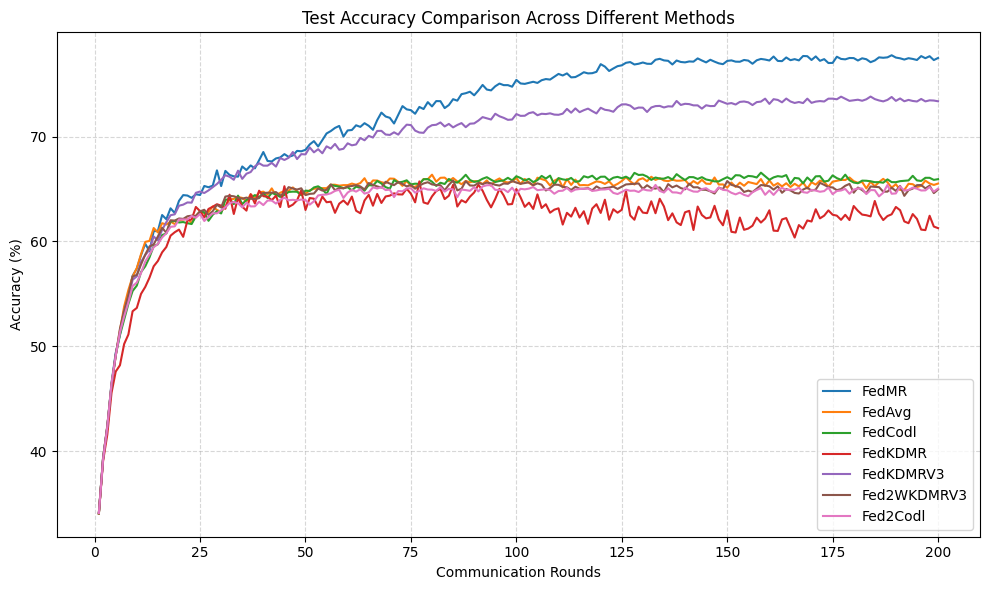

In [26]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import glob
file_dir='output/0'
algorithms=['FedAvg','FedMR','FedCodl_revise','Fed2Codl_revise','FedKDMRV3','Fed2WKDMRV3','FedKDMR_d']
other=['cifar10','test_acc','pre_50']
file_list=find_result_files(file_dir,algorithms,other)
print(len(file_list))


plt.figure(figsize=(10, 6))

# 遍历每个文件并绘制曲线
for file_path in file_list:
    # 读取文件数据
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    
    # 提取文件名作为图例标签（可自定义）
    label = file_path.split('_')[1]  # 例如提取 'FedAvg' 作为标签
    
    # 转换数据并绘制
    accuracy = [float(x) for x in data[1:]]  # 跳过 'base'
    rounds = range(1, len(accuracy) + 1)
    
    plt.plot(rounds, accuracy, marker='', linestyle='-', linewidth=1.5, label=label)

# 添加图表元素
plt.title('Test Accuracy Comparison Across Different Methods')
plt.xlabel('Communication Rounds')
plt.ylabel('Accuracy (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # 显示图例
plt.tight_layout()

# 显示或保存图表
plt.show()

In [235]:
import re
from pathlib import Path

def clean_tensor_file(file_path):
    """完全修正文件内容的可靠版本"""
    file_path = Path(file_path)
    
    # 读取原始内容
    try:
        with open(file_path, 'r') as f:
            content = f.read()
    except Exception as e:
        print(f"读取文件失败: {e}")
        return False

    # 多种匹配模式（覆盖常见情况）
    patterns = [
        r'tensor\((\d+\.\d+)\)',  # tensor(20.3000)
        r'tensor\((\d+)\)',        # tensor(20)
        r'tensor\(([\d\.]+)\)',    # 通用情况
    ]

    # 逐步替换所有匹配项
    for pattern in patterns:
        content = re.sub(pattern, r'\1', content)

    # 写入修正后内容
    try:
        with open(file_path, 'w') as f:
            f.write(content)
        print(f"成功修正文件: {file_path}")
        return True
    except Exception as e:
        print(f"写入文件失败: {e}")
        return False

# 使用示例（替换为你的实际路径）
file_to_fix = "your_data_file.txt"


        
file_dir='output/0'
algorithms=['FedProx'
            ,'FedExP'
           ]
other=['cifar100_','test_acc','pre_50','KD_']
file_list=find_result_files(file_dir,algorithms,other)
print(file_list)
for file_path in file_list:
    print('1')
    if clean_tensor_file(file_path):
        print("修正完成！请检查文件内容")
    else:
        print("修正失败，请检查错误信息")

['output/0/cifar100_FedProx_resnet20_test_acc_2000_lr_0.01_2025_05_02_06_57_12_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt', 'output/0/cifar100_FedExP_resnet20_test_acc_2000_lr_0.01_2025_05_02_10_55_37_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt']
1
成功修正文件: output/0/cifar100_FedProx_resnet20_test_acc_2000_lr_0.01_2025_05_02_06_57_12_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt
修正完成！请检查文件内容
1
成功修正文件: output/0/cifar100_FedExP_resnet20_test_acc_2000_lr_0.01_2025_05_02_10_55_37_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt
修正完成！请检查文件内容


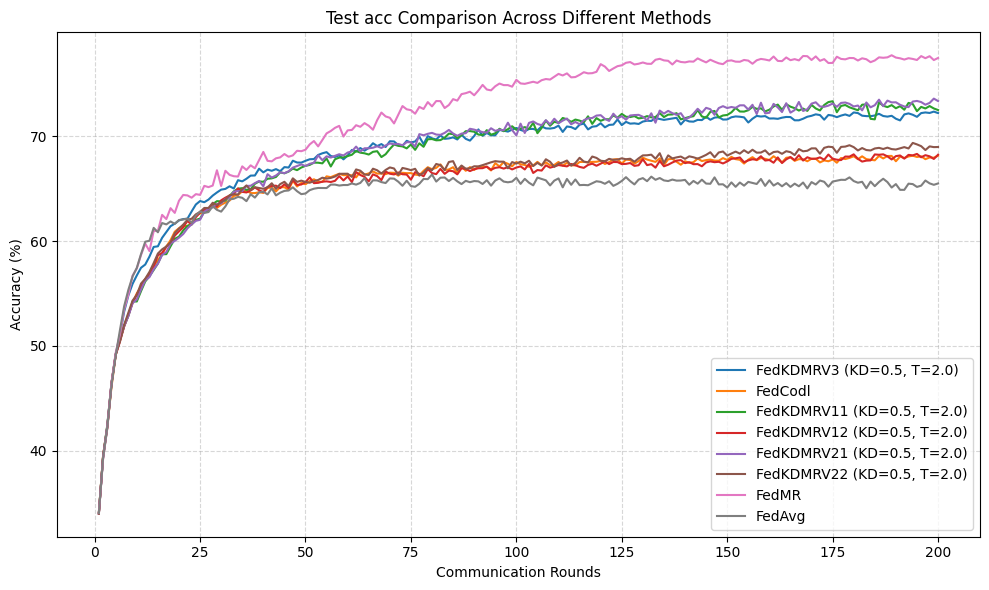

In [57]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import glob
file_dir='output/0'
algorithms1=['FedKDMRV3'
             # ,'FedAvg'
            # ,'FedMR'
            # ,'FedKDMRV3'
            ,'FedKDMRV11'
            ,'FedKDMRV12'
            ,'FedKDMRV21'
            ,'FedKDMRV22'
            ,'FedCodl_'
            ,'FedProx'
            ,'FedExP'
            # ,'FedKDMR_d'
            # ,'Fed2WKDMRV3'
            # ,'Fed2Codl_revise'
           ]
other1=['cifar10_','test_acc','pre_50','KD_0.5']
algorithms2=['FedAvg'
            # ,'FedKDMRV21'
             ,'FedMR'
             # ,'FedKDMRV3'
            
           ]
other2=['cifar10_','test_acc','pre_50']
file_list1=find_result_files(file_dir,algorithms1,other1)
file_list2=find_result_files(file_dir,algorithms2,other2)
file_list=file_list1+file_list2
# file_list=file_list1
plt.figure(figsize=(10, 6))

# 遍历每个文件并绘制曲线
for file_path in file_list:
    # 读取文件数据
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    
    # 提取文件名作为图例标签（可自定义）
    base_label = file_path.split('_')[1]  # 例如提取 'FedAvg' 作为标签
    label = base_label
    if 'FedKDMR' in file_path and 'KD_' in file_path and 'T_' in file_path:
        try:
            # 找到KD和T参数的位置
            kd_idx = file_path.find('KD_') + 3
            t_idx = file_path.find('T_') + 2
            # 提取参数值（假设格式为KD_x.y_T_z.w）
            kd_value = file_path[kd_idx: file_path.find('_', kd_idx)]
            t_value = file_path[t_idx: file_path.find('.', t_idx) + 2]  # 保留小数点后两位
            label = f"{base_label} (KD={kd_value}, T={t_value})"
        except:
            pass  # 如果提取失败保持原标签
    accuracy = [float(x) for x in data[1:]]  # 跳过 'base'
    rounds = range(1, len(accuracy) + 1)
    
    plt.plot(rounds, accuracy, marker='', linestyle='-', linewidth=1.5, label=label)

# 添加图表元素
plt.title('Test acc Comparison Across Different Methods')
plt.xlabel('Communication Rounds')
plt.ylabel('Accuracy (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # 显示图例
plt.tight_layout()

# 显示或保存图表
plt.show()

8


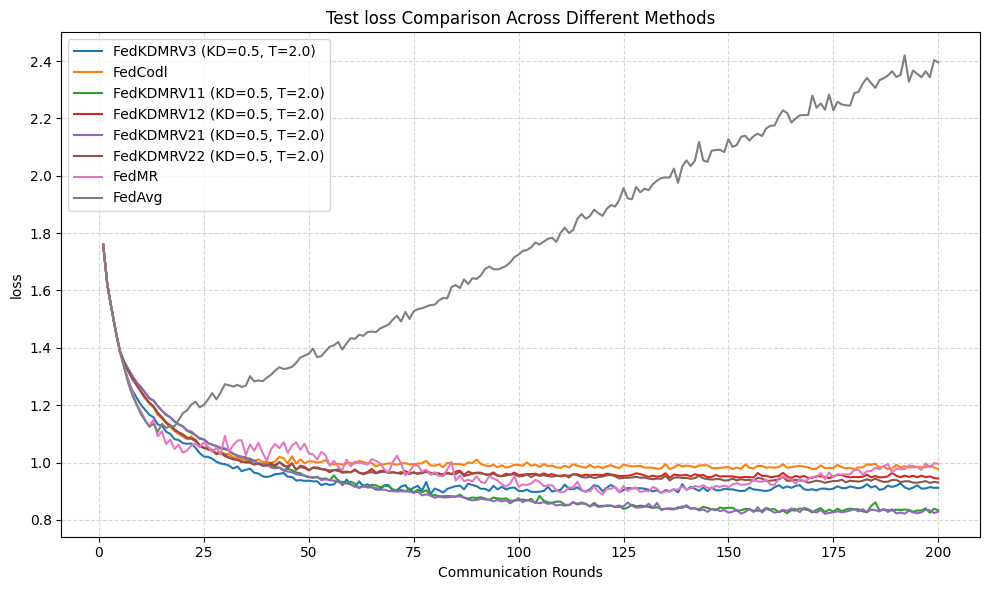

In [55]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import glob
file_dir='output/0'
algorithms1=['FedKDMRV3'
             # ,'FedAvg'
            # ,'FedMR'
            # ,'FedKDMRV3'
            ,'FedKDMRV11'
            ,'FedKDMRV12'
            ,'FedKDMRV21'
            ,'FedKDMRV22'
            ,'FedCodl_'
            ,'FedProx'
            ,'FedExP'
            # ,'FedKDMR_d'
            # ,'Fed2WKDMRV3'
            # ,'Fed2Codl_revise'
           ]
other1=['cifar10_','test_loss','pre_50','KD_0.5']
algorithms2=['FedAvg'
            # ,'FedKDMRV21'
             ,'FedMR'
             # ,'FedKDMRV3'
            
           ]
other2=['cifar10_','test_loss','pre_50']
file_list1=find_result_files(file_dir,algorithms1,other1)
file_list2=find_result_files(file_dir,algorithms2,other2)
file_list=file_list1+file_list2
# file_list=file_list1
print(len(file_list))


plt.figure(figsize=(10, 6))

# 遍历每个文件并绘制曲线
for file_path in file_list:
    # 读取文件数据
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    
    # 提取文件名作为图例标签（可自定义）
    base_label = file_path.split('_')[1]  # 例如提取 'FedAvg' 作为标签
    label = base_label
    if 'FedKDMR' in file_path and 'KD_' in file_path and 'T_' in file_path:
        try:
            # 找到KD和T参数的位置
            kd_idx = file_path.find('KD_') + 3
            t_idx = file_path.find('T_') + 2
            # 提取参数值（假设格式为KD_x.y_T_z.w）
            kd_value = file_path[kd_idx: file_path.find('_', kd_idx)]
            t_value = file_path[t_idx: file_path.find('.', t_idx) + 2]  # 保留小数点后两位
            label = f"{base_label} (KD={kd_value}, T={t_value})"
        except:
            pass  # 如果提取失败保持原标签
    # 转换数据并绘制
    accuracy = [float(x) for x in data[1:]]  # 跳过 'base'
    rounds = range(1, len(accuracy) + 1)
    
    plt.plot(rounds, accuracy, marker='', linestyle='-', linewidth=1.5, label=label)

# 添加图表元素
plt.title('Test loss Comparison Across Different Methods')
plt.xlabel('Communication Rounds')
plt.ylabel('loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # 显示图例
plt.tight_layout()

# 显示或保存图表
plt.show()

14


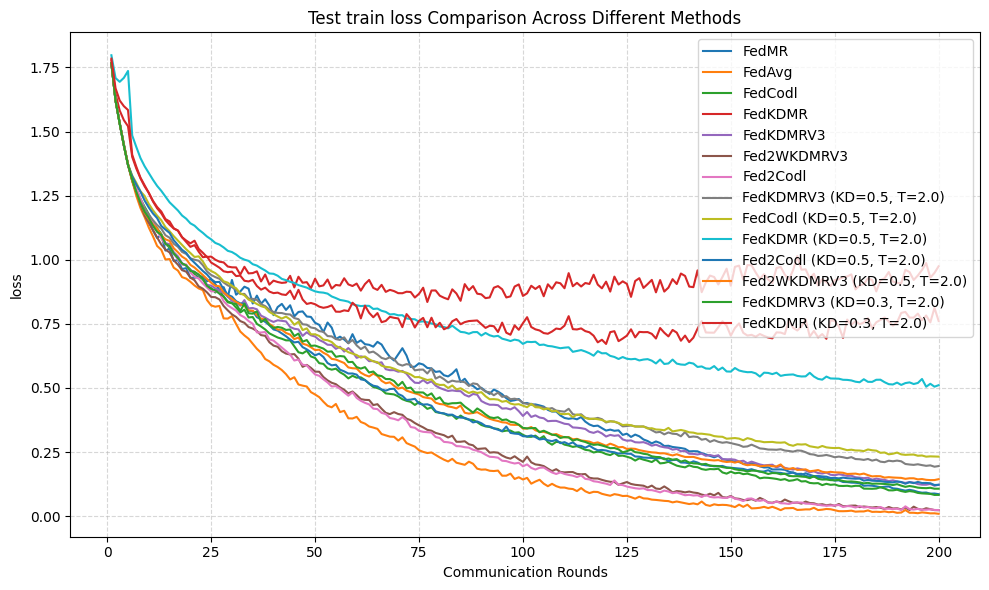

In [215]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import glob
file_dir='output/0'
algorithms=['FedAvg'
            ,'FedMR'
            ,'FedKDMRV3'
            ,'FedCodl_revise'
            ,'FedKDMR_d'
            ,'Fed2WKDMRV3'
            ,'Fed2Codl_revise'
           ]
other=['cifar10_','test_train_loss','pre_50']
file_list=find_result_files(file_dir,algorithms,other)
print(len(file_list))


plt.figure(figsize=(10, 6))

# 遍历每个文件并绘制曲线
for file_path in file_list:
    # 读取文件数据
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    
    # 提取文件名作为图例标签（可自定义）
    base_label = file_path.split('_')[1]  # 例如提取 'FedAvg' 作为标签
    label = base_label
    if 'KD_' in file_path and 'T_' in file_path:
        try:
            # 找到KD和T参数的位置
            kd_idx = file_path.find('KD_') + 3
            t_idx = file_path.find('T_') + 2
            # 提取参数值（假设格式为KD_x.y_T_z.w）
            kd_value = file_path[kd_idx: file_path.find('_', kd_idx)]
            t_value = file_path[t_idx: file_path.find('.', t_idx) + 2]  # 保留小数点后两位
            label = f"{base_label} (KD={kd_value}, T={t_value})"
        except:
            pass  # 如果提取失败保持原标签
    # 转换数据并绘制
    accuracy = [float(x) for x in data[1:]]  # 跳过 'base'
    rounds = range(1, len(accuracy) + 1)
    
    plt.plot(rounds, accuracy, marker='', linestyle='-', linewidth=1.5, label=label)

# 添加图表元素
plt.title('Test train loss Comparison Across Different Methods')
plt.xlabel('Communication Rounds')
plt.ylabel('loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # 显示图例
plt.tight_layout()

# 显示或保存图表
plt.show()

No handles with labels found to put in legend.


[]


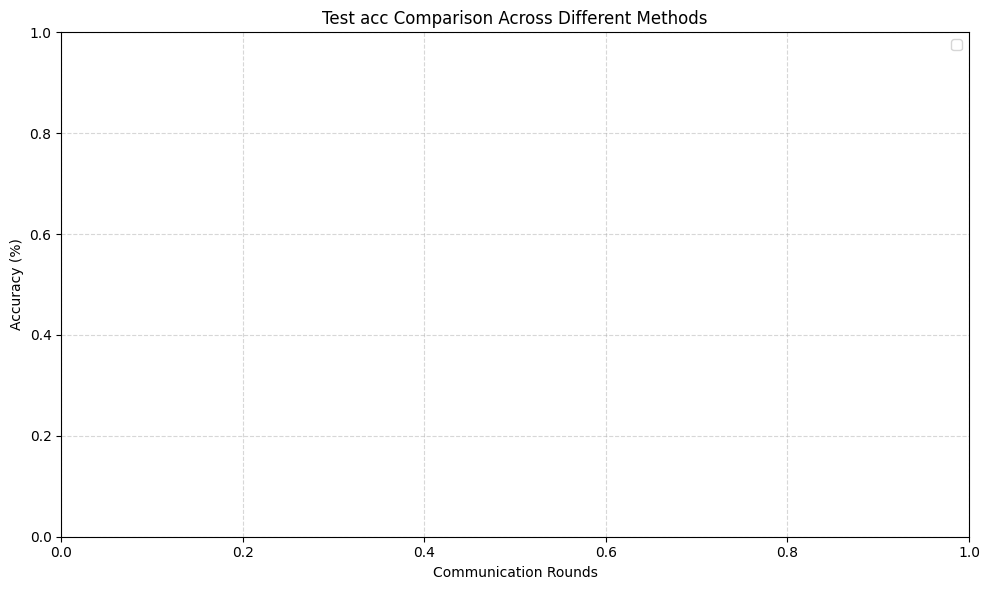

In [24]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import glob
file_dir='output/5/0.5'
algorithms1=['FedKDMRV3'
             ,'FedAvg'
            ,'FedMR_'
            # ,'FedKDMRV3'
            # ,'FedKDMRV11'
            # ,'FedKDMRV12'
            # ,'FedKDMRV21'
            # ,'FedKDMRV22'
            ,'FedCodl_'
            # ,'FedProx'
            # ,'FedExP'
            # ,'FedMRwG'
            # ,'FedKDMR_d'
            # ,'Fed2WKDMRV3'
            # ,'Fed2Codl_revise'
           ]
other1=['emnist-letters_','test_acc','pre_50','KD_','1000_','lr_0.001']
# algorithms2=['FedAvg'
#             # ,'FedKDMRV21'
#              ,'FedMR'
#              # ,'FedKDMRV3'
            
#            ]
# other2=['cifar100_','test_acc','pre_50']
file_list1=find_result_files(file_dir,algorithms1,other1)
# file_list2=find_result_files(file_dir,algorithms2,other2)
# file_list=file_list1+file_list2
file_list=file_list1
print(file_list)
plt.figure(figsize=(10, 6))

# 遍历每个文件并绘制曲线
for file_path in file_list:
    # 读取文件数据
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    
    # 提取文件名作为图例标签（可自定义）
    base_label = file_path.split('_')[1]  # 例如提取 'FedAvg' 作为标签
    label = base_label
    if 'FedKDMR' in file_path and 'KD_' in file_path and 'T_' in file_path:
        try:
            # 找到KD和T参数的位置
            kd_idx = file_path.find('KD_') + 3
            t_idx = file_path.find('T_') + 2
            # 提取参数值（假设格式为KD_x.y_T_z.w）
            kd_value = file_path[kd_idx: file_path.find('_', kd_idx)]
            t_value = file_path[t_idx: file_path.find('.', t_idx) + 2]  # 保留小数点后两位
            label = f"{base_label} (KD={kd_value}, T={t_value})"
        except:
            pass  # 如果提取失败保持原标签
    accuracy = [float(x) for x in data[1:]]  # 跳过 'base'
    rounds = range(1, len(accuracy) + 1)
    
    plt.plot(rounds, accuracy, marker='', linestyle='-', linewidth=1.5, label=label)

# 添加图表元素
plt.title('Test acc Comparison Across Different Methods')
plt.xlabel('Communication Rounds')
plt.ylabel('Accuracy (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # 显示图例
plt.tight_layout()

# 显示或保存图表
plt.show()

In [37]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import glob
file_dir='output/5/0.1'
algorithms1=['FedKDMRV3'
             ,'FedAvg'
            ,'FedMR_'
            # ,'FedKDMRV3'
            # ,'FedKDMRV11'
            # ,'FedKDMRV12'
            # ,'FedKDMRV21'
            # ,'FedKDMRV22'
            ,'FedCodl_'
            ,'FedProx'
            # ,'FedExP'
            # ,'FedMRwG'
            # ,'FedKDMR_d'
            # ,'Fed2WKDMRV3'
            # ,'Fed2Codl_revise'
           ]
other1=['cifar100_','test_acc','pre_50','KD_',]
# algorithms2=['FedAvg'
#             # ,'FedKDMRV21'
#              ,'FedMR'
#              # ,'FedKDMRV3'
            
#            ]
# other2=['cifar100_','test_acc','pre_50']
file_list1=find_result_files(file_dir,algorithms1,other1)
# file_list2=find_result_files(file_dir,algorithms2,other2)
# file_list=file_list1+file_list2
file_list=file_list1
print(len(file_list))
print(file_list)
plt.figure(figsize=(10, 6))

5
['output/5/0.1/fashion-mnist_FedMR_resnet20_test_acc_2000_lr_0.01_2025_05_12_22_48_09_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt', 'output/5/0.1/fashion-mnist_FedKDMRV3_resnet20_test_acc_2000_lr_0.01_2025_05_13_03_29_08_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt', 'output/5/0.1/fashion-mnist_FedAvg_resnet20_test_acc_2000_lr_0.01_2025_05_13_07_11_24_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt', 'output/5/0.1/fashion-mnist_FedCodl_resnet20_test_acc_2000_lr_0.01_2025_05_13_23_21_44_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt', 'output/5/0.1/fashion-mnist_FedProx_resnet20_test_acc_2000_lr_0.01_2025_05_14_06_21_27_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt']


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

5
图表已保存至: output/results/noniid/cifar100_test_acc_noniid_0.1.pdf


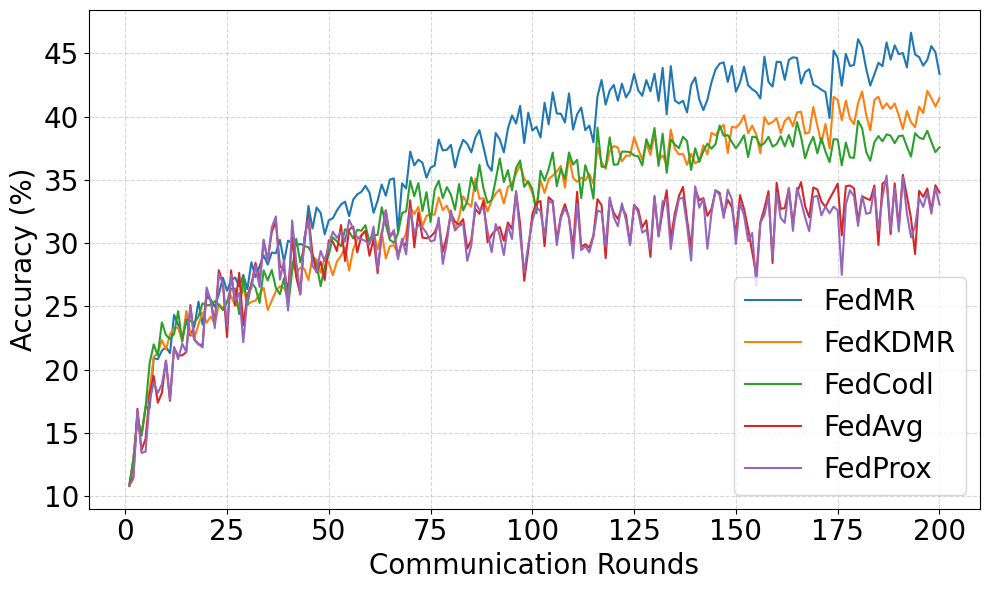

In [12]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import os
import glob
file_dir='output/5/0.1'
save_dir = 'output/results/noniid'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
name= save_dir.split('/')[-1]+'_'+file_dir.split('/')[-1]
# name= save_dir.split('/')[-1]
algorithms1=['FedKDMRV3'
             ,'FedAvg'
            ,'FedMR_'
            # ,'FedKDMRV3'
            # ,'FedKDMRV11'
            # ,'FedKDMRV12'
            # ,'FedKDMRV21'
            # ,'FedKDMRV22'
            ,'FedCodl_'
            ,'FedProx'
            # ,'FedExP'
            # ,'FedMRwG'
            # ,'FedKDMR_d'
            # ,'Fed2WKDMRV3'
            # ,'Fed2Codl_revise'
           ]
other1=['cifar100_','test_acc','pre_50','KD_0.5_T_',]
algorithms2=['FedAvg'
            # ,'FedKDMRV21'
             ,'FedMR'
             # ,'FedKDMRV3'
        
           ]
other2=['cifar10_','test_acc','pre_50']
file_list1=find_result_files(file_dir,algorithms1,other1)
file_list2=find_result_files(file_dir,algorithms2,other2)
# file_list=file_list1+file_list2

file_list=file_list1
print(len(file_list))
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  # 递归创建目录

# 生成文件名：使用other1前两项组合
filename = f"{other1[0].strip('_')}_{other1[1]}_{name}.pdf"
save_path = os.path.join(save_dir, filename)


order= ['FedMR','FedKDMR','FedCodl','FedAvg','FedProx']
def get_priority(filename):
    for i, key in enumerate(order):
        if key in filename:
            return i
    return len(order)
file_list.sort(key=get_priority)



plt.figure(figsize=(10, 6))

# 遍历每个文件并绘制曲线
for file_path in file_list:
    # 读取文件数据
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    
    # 提取文件名作为图例标签（可自定义）
    base_label = file_path.split('_')[1]  # 例如提取 'FedAvg' 作为标签
    label = base_label
    if 'FedKDMR' in file_path and 'KD_' in file_path and 'T_' in file_path:
        try:
            # 找到KD和T参数的位置
            # kd_idx = file_path.find('KD_') + 3
            # t_idx = file_path.find('T_') + 2
            base_label = 'FedKDMR'
            # 提取参数值（假设格式为KD_x.y_T_z.w）
            # kd_value = file_path[kd_idx: file_path.find('_', kd_idx)]
            # t_value = file_path[t_idx: file_path.find('.', t_idx) + 2]  # 保留小数点后两位
            # label = f"{base_label} (KD={kd_value}, T={t_value})"
            label = f"{base_label}"
        except:
            pass  # 如果提取失败保持原标签
    accuracy = [float(x) for x in data[1:]]  # 跳过 'base'
    rounds = range(1, len(accuracy) + 1)
    
    plt.plot(rounds, accuracy, marker='', linestyle='-', linewidth=1.5, label=label)

# 添加图表元素
# plt.title(f"{other1[0].strip('_')}_{name}")
plt.xlabel('Communication Rounds',fontsize=20)
plt.ylabel('Accuracy (%)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right', fontsize=20)  # 显示图例
plt.tight_layout()

plt.savefig(save_path, format='pdf', bbox_inches='tight')
print(f"图表已保存至: {save_path}")
# 显示或保存图表
plt.show()

图表已保存至: output/results/iid/fashion-mnist_test_loss_iid.pdf


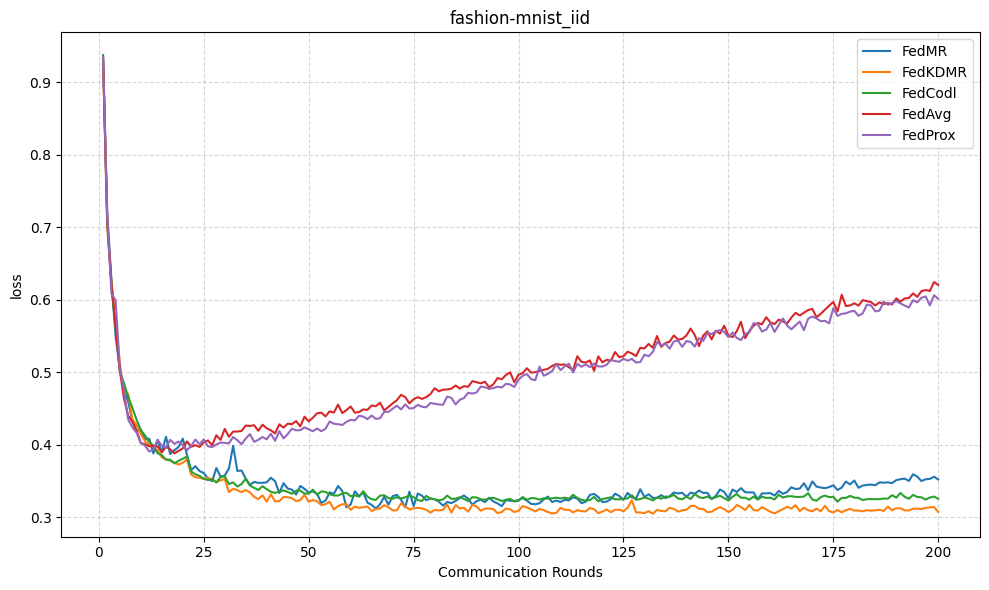

In [4]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import os
import glob
file_dir='output/0'
save_dir = 'output/results/iid'
name= save_dir.split('/')[-1]
algorithms1=['FedKDMRV3'
             ,'FedAvg'
            ,'FedMR_'
            # ,'FedKDMRV3'
            # ,'FedKDMRV11'
            # ,'FedKDMRV12'
            # ,'FedKDMRV21'
            # ,'FedKDMRV22'
            ,'FedCodl_'
            ,'FedProx'
            # ,'FedExP'
            # ,'FedMRwG'
            # ,'FedKDMR_d'
            # ,'Fed2WKDMRV3'
            # ,'Fed2Codl_revise'
           ]
other1=['fashion-mnist_','test_loss','pre_50','KD_0.5',]
# algorithms2=['FedAvg'
#             # ,'FedKDMRV21'
#              ,'FedMR'
#              # ,'FedKDMRV3'
            
#            ]
# other2=['cifar10_','test_loss','pre_50']
file_list1=find_result_files(file_dir,algorithms1,other1)
# file_list2=find_result_files(file_dir,algorithms2,other2)
# file_list=file_list1+file_list2
file_list=file_list1

if not os.path.exists(save_dir):
    os.makedirs(save_dir)  # 递归创建目录

# 生成文件名：使用other1前两项组合
filename = f"{other1[0].strip('_')}_{other1[1]}_{name}.pdf"
save_path = os.path.join(save_dir, filename)
order= ['FedMR','FedKDMR','FedCodl','FedAvg','FedProx']
def get_priority(filename):
    for i, key in enumerate(order):
        if key in filename:
            return i
    return len(order)
file_list.sort(key=get_priority)


plt.figure(figsize=(10, 6))

# 遍历每个文件并绘制曲线
for file_path in file_list:
    # 读取文件数据
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    
    # 提取文件名作为图例标签（可自定义）
    base_label = file_path.split('_')[1]  # 例如提取 'FedAvg' 作为标签
    label = base_label
    if 'FedKDMR' in file_path and 'KD_' in file_path and 'T_' in file_path:
        try:
            # 找到KD和T参数的位置
            # kd_idx = file_path.find('KD_') + 3
            # t_idx = file_path.find('T_') + 2
            base_label = 'FedKDMR'
            # 提取参数值（假设格式为KD_x.y_T_z.w）
            # kd_value = file_path[kd_idx: file_path.find('_', kd_idx)]
            # t_value = file_path[t_idx: file_path.find('.', t_idx) + 2]  # 保留小数点后两位
            # label = f"{base_label} (KD={kd_value}, T={t_value})"
            label = f"{base_label}"
        except:
            pass  # 如果提取失败保持原标签
    accuracy = [float(x) for x in data[1:]]  # 跳过 'base'
    rounds = range(1, len(accuracy) + 1)
    
    plt.plot(rounds, accuracy, marker='', linestyle='-', linewidth=1.5, label=label)

# 添加图表元素
plt.title(f"{other1[0].strip('_')}_{name}")
plt.xlabel('Communication Rounds')
plt.ylabel('loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # 显示图例
plt.tight_layout()

plt.savefig(save_path, format='pdf', bbox_inches='tight')
print(f"图表已保存至: {save_path}")
# 显示或保存图表
plt.show()

['output/5/0.5/cifar100_FedMR_resnet20_test_loss_2000_lr_0.01_2025_05_06_20_20_55_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt', 'output/5/0.5/cifar100_FedKDMRV3_resnet20_test_loss_2000_lr_0.01_2025_05_07_01_20_27_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt', 'output/5/0.5/cifar100_FedCodl_resnet20_test_loss_2000_lr_0.01_2025_05_07_06_49_32_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt']
图表已保存至: output/results/noniid/cifar100_test_loss_noniid_0.5_3.pdf


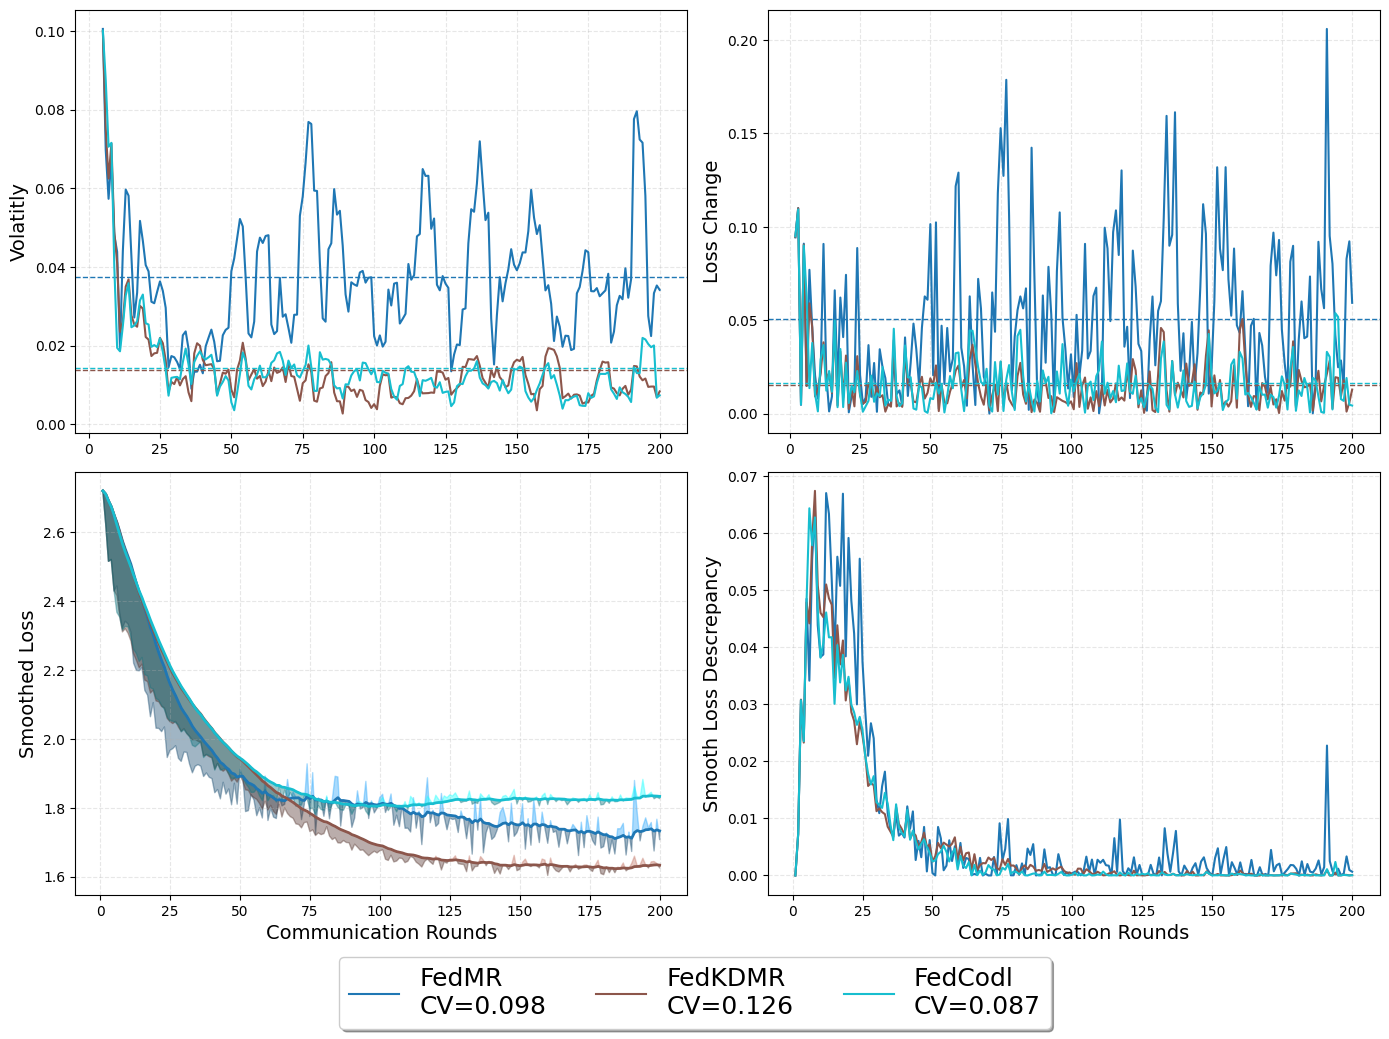

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from findfile import find_result_files
from scipy.ndimage import gaussian_filter1d
import glob
import os
from matplotlib import colors as mcolors
window_size = 10  # 方差计算的窗口大小
smoothing_factor = 0.2 
file_dir='output/5/0.5'
save_dir = 'output/results/noniid'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
name= save_dir.split('/')[-1]+'_'+file_dir.split('/')[-1]
# name= save_dir.split('/')[-1]
algorithms1=['FedKDMRV3'
             # ,'FedAvg'
            ,'FedMR_'
            # ,'FedKDMRV3'
            # ,'FedKDMRV11'
            # ,'FedKDMRV12'
            # ,'FedKDMRV21'
            # ,'FedKDMRV22'
            ,'FedCodl_'
            # ,'FedProx'
            # ,'FedExP'
            # ,'FedMRwG'
            # ,'FedKDMR_d'
            # ,'Fed2WKDMRV3'
            # ,'Fed2Codl_revise'
           ]
other1=['cifar100_','test_loss','pre_50','KD_0.5_T_2.0']
algorithms2=['FedMR'
            # ,'FedKDMRV21'
             # ,'FedAvg'
             # ,'FedKDMRV3'
            
           ]
other2=['cifar10_','test_loss','pre_50']
file_list1=find_result_files(file_dir,algorithms1,other1)
# file_list2=find_result_files(file_dir,algorithms2,other2)
# file_list=file_list1+file_list2
file_list=file_list1
print(file_list)
num=len(file_list)
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
filename = f"{other1[0].strip('_')}_{other1[1]}_{name}_{num}.pdf"
save_path = os.path.join(save_dir, filename)
order= ['FedMR','FedKDMR','FedCodl','FedAvg','FedProx']
def get_priority(filename):
    for i, key in enumerate(order):
        if key in filename:
            return i
    return len(order)
file_list.sort(key=get_priority)

def adjust_lightness(color, amount=1.0):
    if isinstance(color, (tuple, list)) and len(color) >= 3:
        c = color[:3]
    else:
        c = mcolors.to_rgb(color)
    return tuple(max(min(ci * amount, 1.0), 0.0) for ci in c)

# 设置参数
window_size = 5
smoothing_factor = 0.1

# 创建2x2的子图布局
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 增加宽度以容纳CV信息
ax1, ax2, ax3, ax4 = axs.flatten()

# 颜色循环
colors = plt.cm.tab10(np.linspace(0, 1, len(file_list)))

# 创建共享图例的句柄列表和CV信息
legend_handles = []
legend_labels = []
cv_values = []

# 遍历每个文件并绘制曲线
for idx, file_path in enumerate(file_list):
    # 读取数据
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    loss = [float(x) for x in data[1:]]  # 跳过'base'
    rounds = range(1, len(loss) + 1)
    
    # 计算变异系数(CV) - 标准差/平均值
    loss_array = np.array(loss)
    cv = np.std(loss_array) / np.mean(loss_array)
    cv_values.append(f"{cv:.3f}")  # 保留3位小数
    
    # 提取标签
    base_label = file_path.split('_')[1]
    label = base_label
    if 'FedKDMR' in file_path and 'KD_' in file_path and 'T_' in file_path:
        try:
            # kd_idx = file_path.find('KD_') + 3
            # t_idx = file_path.find('T_') + 2
            # kd_value = file_path[kd_idx: file_path.find('_', kd_idx)]
            # t_value = file_path[t_idx: file_path.find('.', t_idx) + 2]
            # label = f"{base_label} (KD={kd_value}, T={t_value})"
            base_label = 'FedKDMR'
            label = f"{base_label}"
        except:
            pass
    
    # 保存图例信息
    line, = ax1.plot([], [], color=colors[idx], linewidth=1.5, label=label)
    legend_handles.append(line)
    legend_labels.append(label)
    
    # ========== 1. Loss Variance/Volatility ==========
    # rolling_variance = []
    # for i in range(len(loss) - window_size + 1):
    #     window = loss[i:i+window_size]
    #     rolling_variance.append(np.var(window))
    
    # ax1.plot(rounds[window_size-1:], rolling_variance, 
    #          color=colors[idx], linewidth=1.5)
    rolling_std = []
    for i in range(len(loss) - window_size + 1):
        window = loss[i:i+window_size]
        rolling_std.append(np.std(window))
    
    # 计算整个训练过程中的平均标准差
    avg_rolling_std = np.mean(rolling_std)
    
    # 在ax1上绘制滑动标准差
    ax1.plot(rounds[window_size-1:], rolling_std, 
             color=colors[idx], linewidth=1.5)
    
    # 添加平均标准差线
    ax1.axhline(y=avg_rolling_std, color=colors[idx], linestyle='--', linewidth=1)
    # ========== 2. Round-to-Round Loss Change ==========
    delta_loss = np.abs(np.diff(loss))
    mean_delta = np.mean(delta_loss)
    
    ax2.plot(rounds[1:], delta_loss, color=colors[idx], linewidth=1.5)
    ax2.axhline(y=mean_delta, color=colors[idx], linestyle='--', linewidth=1)
    
    # ========== 3. Smoothed Convergence Trends ==========
    smoothed_loss = [loss[0]]
    for t in range(1, len(loss)):
        smoothed = smoothing_factor * loss[t] + (1-smoothing_factor) * smoothed_loss[t-1]
        smoothed_loss.append(smoothed)
    
    ax3.plot(rounds, smoothed_loss, color=colors[idx], linewidth=2)
    dark_c = adjust_lightness(colors[idx], 0.6)
    light_c = adjust_lightness(colors[idx], 1.4)
    
    smoothed_loss = np.asarray(smoothed_loss)
    loss = np.asarray(loss)
    ax3.fill_between(rounds, loss, smoothed_loss, where=(smoothed_loss >= loss),
                    interpolate=True, color=dark_c, alpha=0.4)
    ax3.fill_between(rounds, loss, smoothed_loss, where=(smoothed_loss < loss),
                    interpolate=True, color=light_c, alpha=0.4)
    
    # ========== 4. Squared Error ==========
    squared_deviation = (np.array(loss) - np.array(smoothed_loss)) ** 2
    # squared_deviation = [(s - l) ** 2 for s, l in zip(smoothed_loss, loss)]
    # 计算整个序列的平均绝对偏差
    # avg_abs_deviation = np.mean(abs_deviation)
    
    # ax4.plot(rounds, abs_deviation, 
    #          color=colors[idx], linewidth=1.5)
    ax4.plot(rounds,  squared_deviation, 
             color=colors[idx], linewidth=1.5)

# 准备图例文本（包含CV值）
legend_text = [f"{label}\nCV={cv}" for label, cv in zip(legend_labels, cv_values)]

ncol = len(legend_handles)
legend = fig.legend(legend_handles, legend_text,
                   loc='upper center',
                   bbox_to_anchor=(0.5, 0.05),
                   ncol=ncol,
                   frameon=True,
                   fancybox=True,
                   shadow=True,
                   fontsize=18)

# ax1.set_title(' (Rolling Window Variance)')
# ax1.set_title(f'Loss Volatility(Rolling Standard Deviation, Window Size={window_size})',fontsize=14)
ax1.set_ylabel('Volatitly',fontsize=14)
# ax1.set_ylim(0.00001,0.08)
ax1.grid(True, linestyle='--', alpha=0.3)

# ax2.set_title('Round-to-Round Loss Change',fontsize=14)
ax2.set_ylabel('Loss Change',fontsize=14)
# ax2.set_ylim(0.00001,0.1)
ax2.grid(True, linestyle='--', alpha=0.3)

# ax3.set_title('Smoothed Convergence Trends',fontsize=14)
ax3.set_xlabel('Communication Rounds',fontsize=14)
ax3.set_ylabel('Smoothed Loss',fontsize=14)
ax3.grid(True, linestyle='--', alpha=0.3)

# ax4.set_title('||S_t-l_t||^2',fontsize=14)
ax4.set_xlabel('Communication Rounds',fontsize=14)
ax4.set_ylabel('Smooth Loss Descrepancy',fontsize=14)
ax4.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # 为底部图例留出更多空间
plt.savefig(save_path, format='pdf', bbox_inches='tight')
print(f"图表已保存至: {save_path}")
plt.show()

图表已保存至: output/results/iid/cifar10_test_loss_iid_3.pdf


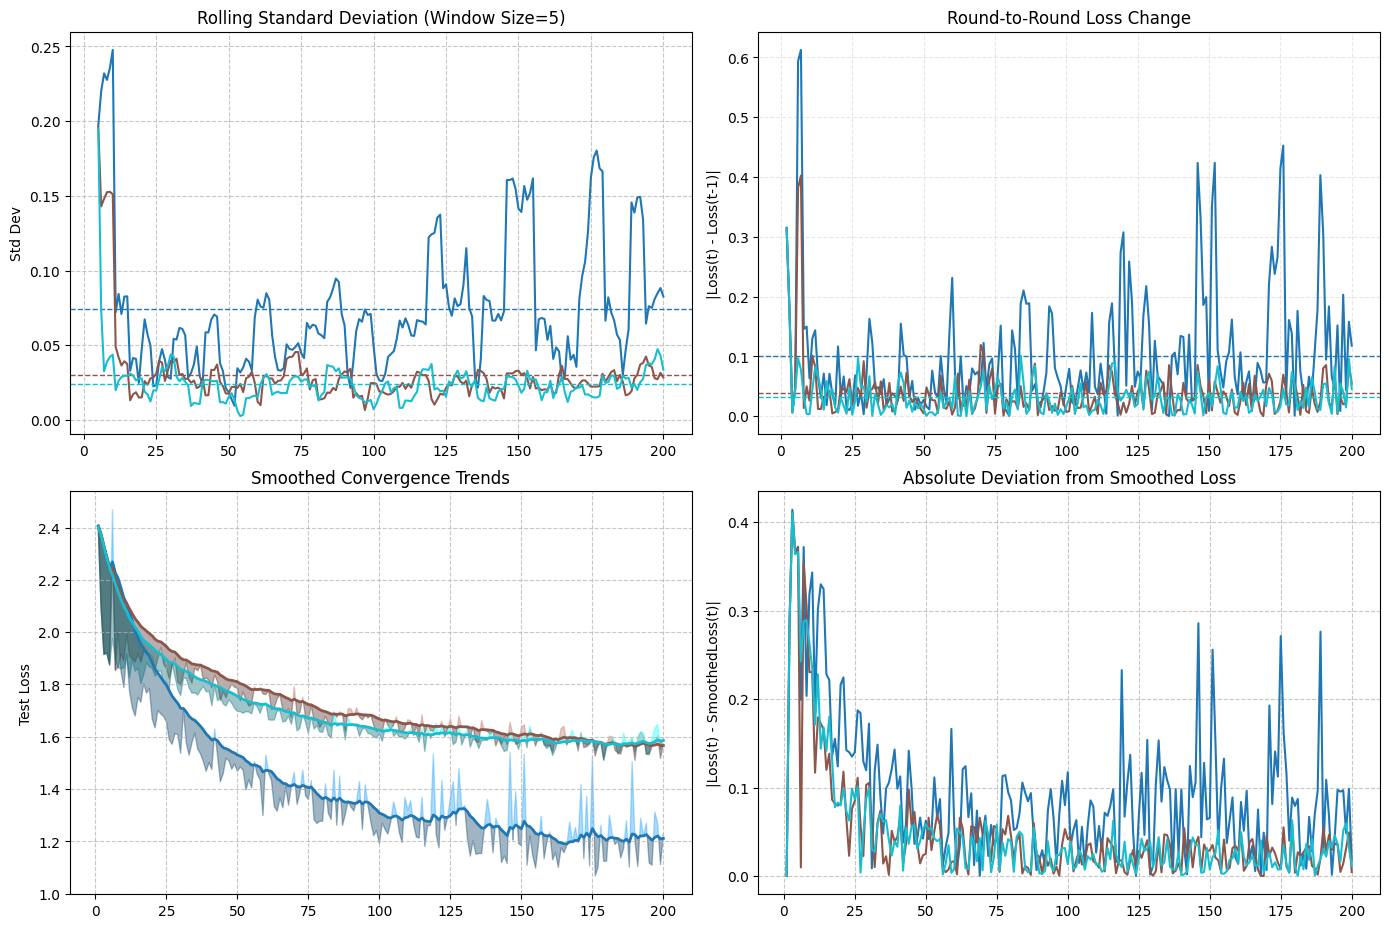

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from findfile import find_result_files
from scipy.ndimage import gaussian_filter1d
import glob
from matplotlib import colors as mcolors
window_size = 10  # 方差计算的窗口大小
smoothing_factor = 0.2 
file_dir='output/5/0.1'
# save_dir = 'output/results/iid'
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)
# # name= save_dir.split('/')[-1]+'_'+file_dir.split('/')[-1]
# name= save_dir.split('/')[-1]
algorithms1=['FedKDMRV3'
             # ,'FedAvg'
            ,'FedMR_'
            # ,'FedKDMRV3'
            # ,'FedKDMRV11'
            # ,'FedKDMRV12'
            # ,'FedKDMRV21'
            # ,'FedKDMRV22'
            ,'FedCodl_'
            # ,'FedProx'
            # ,'FedExP'
            # ,'FedMRwG'
            # ,'FedKDMR_d'
            # ,'Fed2WKDMRV3'
            # ,'Fed2Codl_revise'
           ]
other1=['cifar10_','test_loss','pre_50','KD_0.5']
# algorithms2=['FedMR'
#             # ,'FedKDMRV21'
#              # ,'FedAvg'
#              # ,'FedKDMRV3'
            
#            ]
# other2=['cifar10_','test_loss','pre_50']
file_list1=find_result_files(file_dir,algorithms1,other1)
# file_list2=find_result_files(file_dir,algorithms2,other2)
# file_list=file_list1+file_list2
file_list=file_list1
num=len(file_list)
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
filename = f"{other1[0].strip('_')}_{other1[1]}_{name}_{num}.pdf"
save_path = os.path.join(save_dir, filename)
order= ['FedMR','FedKDMR','FedCodl','FedAvg','FedProx']
def get_priority(filename):
    for i, key in enumerate(order):
        if key in filename:
            return i
    return len(order)
file_list.sort(key=get_priority)

def adjust_lightness(color, amount=1.0):
    if isinstance(color, (tuple, list)) and len(color) >= 3:
        c = color[:3]
    else:
        c = mcolors.to_rgb(color)
    return tuple(max(min(ci * amount, 1.0), 0.0) for ci in c)

# 设置参数
window_size = 5
smoothing_factor = 0.1
slope_window = 5
# 创建2x2的子图布局
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 增加宽度以容纳CV信息
ax1, ax2, ax3, ax4 = axs.flatten()

# 颜色循环
colors = plt.cm.tab10(np.linspace(0, 1, len(file_list)))

# 创建共享图例的句柄列表和CV信息
legend_handles = []
legend_labels = []
cv_values = []
mean_delta_values = []
second_deriv_variability = []
mad_values = []
std_dev_values = []
# 遍历每个文件并绘制曲线
for idx, file_path in enumerate(file_list):
    # 读取数据
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    loss = [float(x) for x in data[1:]]  # 跳过'base'
    rounds = range(1, len(loss) + 1)
    
    # 计算变异系数(CV) - 标准差/平均值
    loss_array = np.array(loss)
    cv = np.std(loss_array) / np.mean(loss_array)
    cv_values.append(f"{cv:.3f}")  # 保留3位小数
    
    # 提取标签
    base_label = file_path.split('_')[1]
    label = base_label
    if 'FedKDMR' in file_path and 'KD_' in file_path and 'T_' in file_path:
        try:
            # kd_idx = file_path.find('KD_') + 3
            # t_idx = file_path.find('T_') + 2
            # kd_value = file_path[kd_idx: file_path.find('_', kd_idx)]
            # t_value = file_path[t_idx: file_path.find('.', t_idx) + 2]
            # label = f"{base_label} (KD={kd_value}, T={t_value})"
            base_label = 'FedKDMR'
            label = f"{base_label}"
        except:
            pass
    
    # 保存图例信息
    line, = ax1.plot([], [], color=colors[idx], linewidth=1.5, label=label)
    legend_handles.append(line)
    legend_labels.append(label)
    
    # # ========== 1. Loss Variance/Volatility ==========
    # rolling_variance = []
    # for i in range(len(loss) - window_size + 1):
    #     window = loss[i:i+window_size]
    #     rolling_variance.append(np.var(window))
    
    # ax1.plot(rounds[window_size-1:], rolling_variance, 
    #          color=colors[idx], linewidth=1.5)

    rolling_std = []
    for i in range(len(loss) - window_size + 1):
        window = loss[i:i+window_size]
        rolling_std.append(np.std(window))
    
    # 计算整个训练过程中的平均标准差
    avg_rolling_std = np.mean(rolling_std)
    
    # 在ax1上绘制滑动标准差
    ax1.plot(rounds[window_size-1:], rolling_std, 
             color=colors[idx], linewidth=1.5)
    
    # 添加平均标准差线
    ax1.axhline(y=avg_rolling_std, color=colors[idx], linestyle='--', linewidth=1)
    
    # ========== 2. Round-to-Round Loss Change ==========
    delta_loss = np.abs(np.diff(loss))
    mean_delta = np.mean(delta_loss)
    
    ax2.plot(rounds[1:], delta_loss, color=colors[idx], linewidth=1.5)
    ax2.axhline(y=mean_delta, color=colors[idx], linestyle='--', linewidth=1)

    #  # ========== 2. 一阶导波动性 (First Derivative Variability) ==========
    # # 计算一阶导数（损失变化）
    # first_deriv = np.diff(loss)
    
    # # 计算一阶导数的滑动标准差
    # deriv_std = []
    # for i in range(len(first_deriv) - window_size + 1):
    #     window = first_deriv[i:i+window_size]
    #     deriv_std.append(np.std(window))
    
    # # 计算整个训练过程中的平均一阶导波动性
    # avg_deriv_std = np.mean(deriv_std)
    
    
    # # 在ax2上绘制一阶导波动性
    # ax2.plot(rounds[window_size:], deriv_std, 
    #          color=colors[idx], linewidth=1.5)
    
    # # 添加平均波动性线
    # ax2.axhline(y=avg_deriv_std, color=colors[idx], linestyle='--', linewidth=1)

    # ========== 3. Smoothed Convergence Trends ==========
    smoothed_loss = [loss[0]]
    for t in range(1, len(loss)):
        smoothed = smoothing_factor * loss[t] + (1-smoothing_factor) * smoothed_loss[t-1]
        smoothed_loss.append(smoothed)
    
    ax3.plot(rounds, smoothed_loss, color=colors[idx], linewidth=2)
    dark_c = adjust_lightness(colors[idx], 0.6)
    light_c = adjust_lightness(colors[idx], 1.4)
    
    smoothed_loss = np.asarray(smoothed_loss)
    loss = np.asarray(loss)
    ax3.fill_between(rounds, loss, smoothed_loss, where=(smoothed_loss >= loss),
                    interpolate=True, color=dark_c, alpha=0.4)
    ax3.fill_between(rounds, loss, smoothed_loss, where=(smoothed_loss < loss),
                    interpolate=True, color=light_c, alpha=0.4)
    
    # ========== 4. 平滑损失的绝对偏差 (Mean Absolute Deviation from Smoothed Loss) ==========
    # 计算每个点与平滑损失的绝对偏差
    # abs_deviation = np.abs(np.array(loss) - np.array(smoothed_loss))
    squared_deviation = (np.array(loss) - np.array(smoothed_loss)) ** 2
    # squared_deviation = [(s - l) ** 2 for s, l in zip(smoothed_loss, loss)]
    # 计算整个序列的平均绝对偏差
    # avg_abs_deviation = np.mean(abs_deviation)
    
    # ax4.plot(rounds, abs_deviation, 
    #          color=colors[idx], linewidth=1.5)
    ax4.plot(rounds,  squared_deviation, 
             color=colors[idx], linewidth=1.5)
    
    # 添加平均偏差线
    # ax4.axhline(y=avg_abs_deviation, color=colors[idx], linestyle='--', linewidth=1)
   

# ========== 设置图形属性 ==========
# 设置第一个子图（滚动方差）
ax1.set_title(f'Rolling Standard Deviation (Window Size={window_size})')
ax1.set_ylabel('Std Dev')
ax1.grid(True, linestyle='--', alpha=0.7)
# ax1.legend(handles=legend_handles, labels=legend_labels, loc='upper right')

# 设置第二个子图（相邻轮次变化）
ax2.set_title('Round-to-Round Loss Change')
ax2.set_ylabel('|Loss(t) - Loss(t-1)|')
ax2.grid(True, linestyle='--', alpha=0.3)

# 设置第三个子图（滑动标准差）
ax3.set_title('Smoothed Convergence Trends')
ax3.set_ylabel('Test Loss')
ax3.grid(True, linestyle='--', alpha=0.7)

# 设置第四个子图（一阶导波动性）
ax4.set_title('Absolute Deviation from Smoothed Loss')
ax4.set_ylabel('|Loss(t) - SmoothedLoss(t)|')
ax4.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # 为底部图例留出更多空间
# plt.savefig(save_path, format='pdf', bbox_inches='tight')
print(f"图表已保存至: {save_path}")
plt.show()

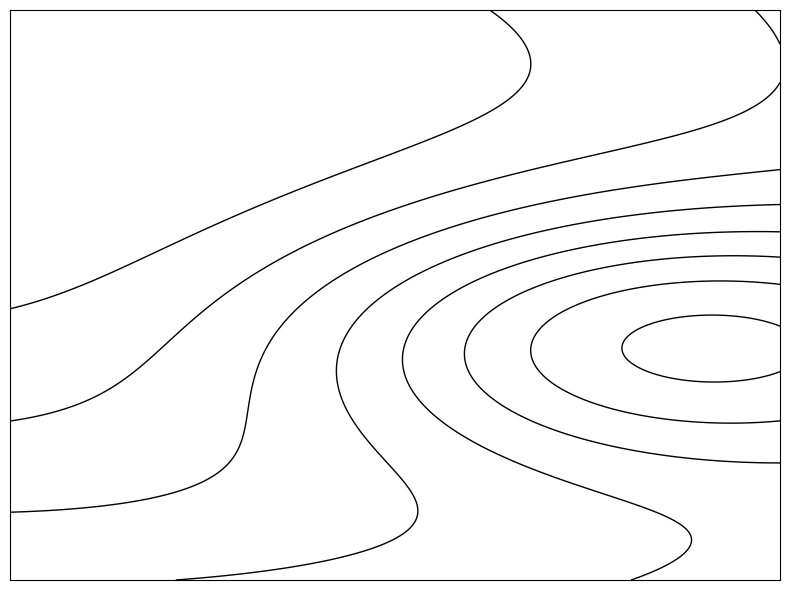

In [92]:
import numpy as np
import matplotlib.pyplot as plt



x = np.linspace(-0,1.75, 500)
y = np.linspace(-2.5, 1, 500)
X, Y = np.meshgrid(x, y)

# 定义损失地形
def loss(x, y):
    """非负损失地形，含陡峭峡谷和平坦区域"""
    # 平坦区域（全局最小）
    flat_region = 0.5 * np.exp(-(x**2 + (y-1)**2)/8)
    
    # 陡峭峡谷（局部最优）
    steep_valley = 1.5 * np.exp(-((x-1.5)**2 + (y+1)**2)*1.5)
    
    # 背景势能（确保非负）
    background = 0.1 * (x**2 + y**2)
    
    # 组合并平移确保最小值为0
    combined = background + steep_valley - flat_region
    return combined - combined.min()  # 平移至非负

Z = loss(X, Y)

# 绘制等高线图
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=8, colors='k', linewidths=1)  # 移除clabel调用
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.grid(False)
plt.tight_layout()
plt.show()